In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
# data_path_1 = r'/Users/faiz.yah/Documents/2_Personal/ds_personal_project/spaceship_titanic/dataset/spaceship-titanic/train.csv'
# data_path_2 = r'/Users/faiz.yah/Documents/2_Personal/ds_personal_project/spaceship_titanic/dataset/spaceship-titanic/test.csv'

data_path_1 = "https://raw.githubusercontent.com/faiz-yah/End-to-end-ML/refs/heads/main/spaceship_titanic/dataset/spaceship-titanic/test.csv"
data_path_2 = "https://raw.githubusercontent.com/faiz-yah/End-to-end-ML/refs/heads/main/spaceship_titanic/dataset/spaceship-titanic/train.csv"

df_1 = pd.read_csv(data_path_1)
df_2 = pd.read_csv(data_path_2)

In [14]:
df = pd.concat([df_1, df_2])

In [17]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
# EDA
## Regular checkings
### 1. Check the shape
### 2. Check missing values, how to deal with it

## Nuemrical features analysia
### 1. Check the distribution of numerical features


## Categorical features analysis
### 1. Check the distribution of categorical features

## Target feature analysis
### 1. Check the distribution of target feature (unbalance or balanced data)

#######################################

# Train and Predict



# EDA

## Regular Checks

In [18]:
## Check for null values 
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [19]:
## Check for duplicated rows
df.duplicated().sum()

np.int64(0)

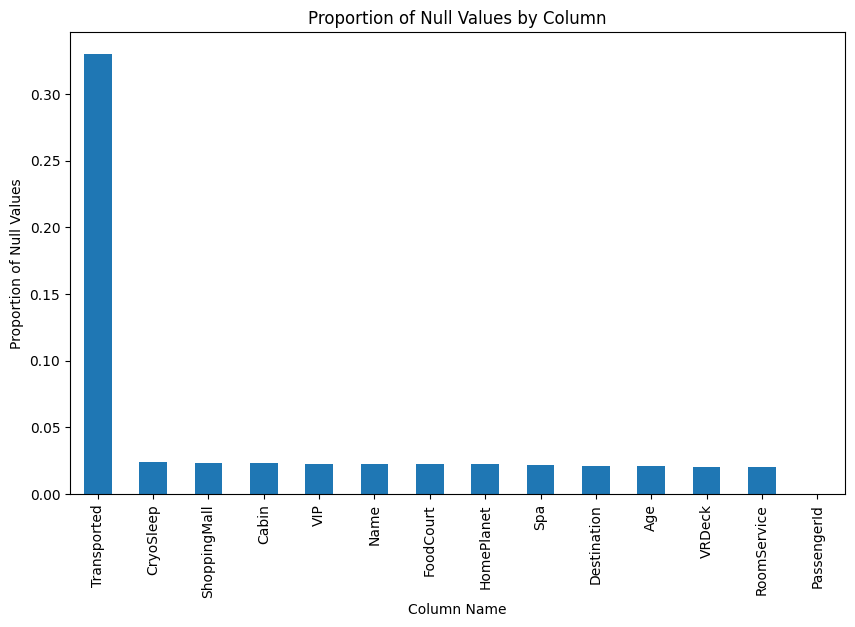

In [20]:
# Calculate null value proportion for each column
null_proportion = df.isnull().mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
null_proportion.plot(kind='bar')
plt.title('Proportion of Null Values by Column')
plt.ylabel('Proportion of Null Values')
plt.xlabel('Column Name')
plt.show()

## Numerical features analysis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

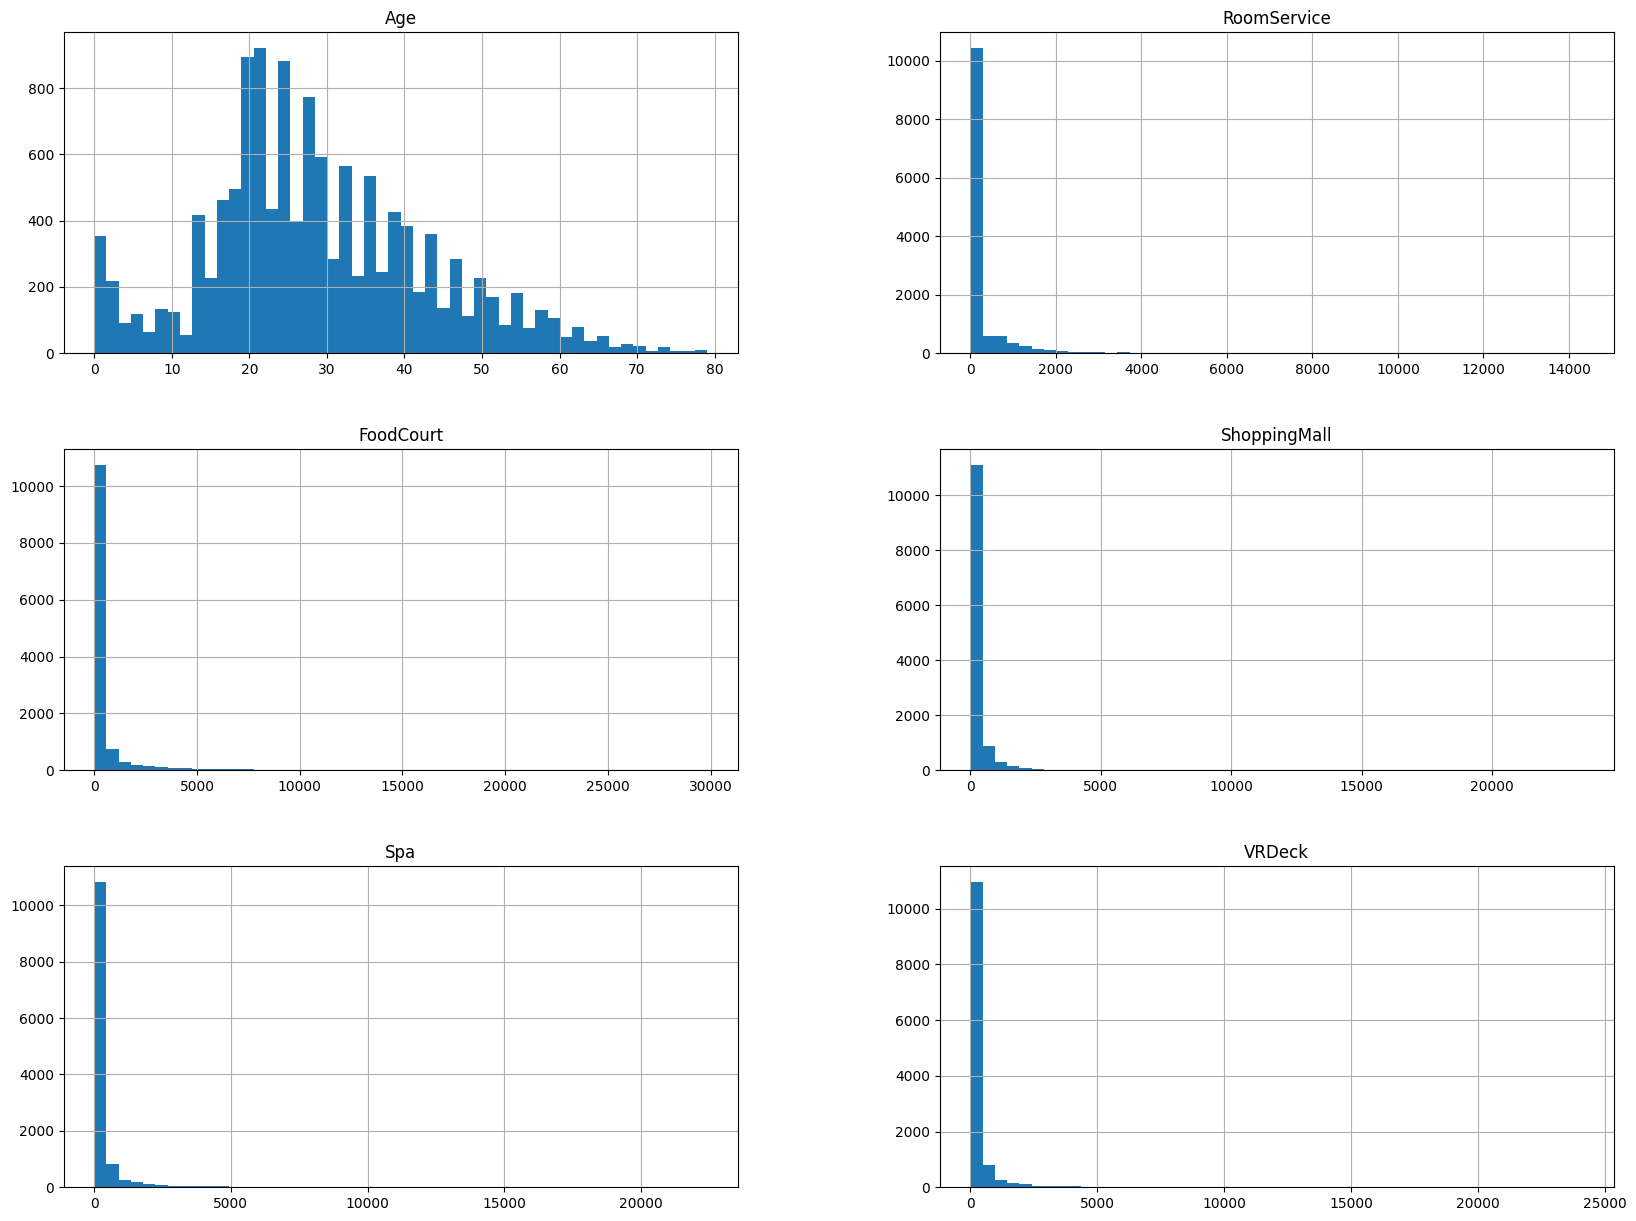

In [21]:
df[df.select_dtypes(include='number').columns].hist(bins=50, figsize=(20,15))

In [9]:
## Most of them has a right-skewed distribution, so we need to apply a certain transformation to make it more normal distribution

## Categorical features analysis

In [207]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

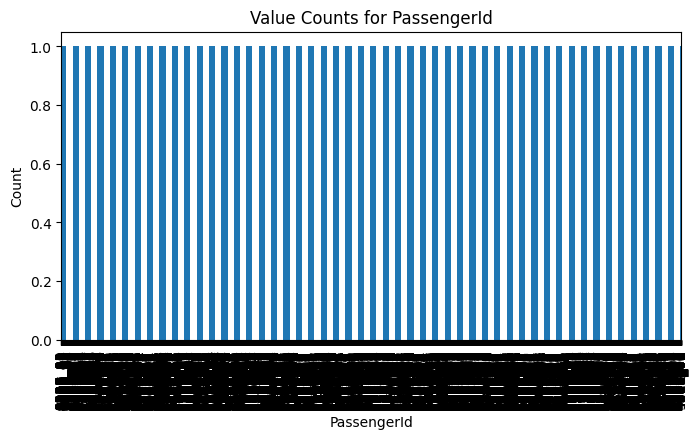

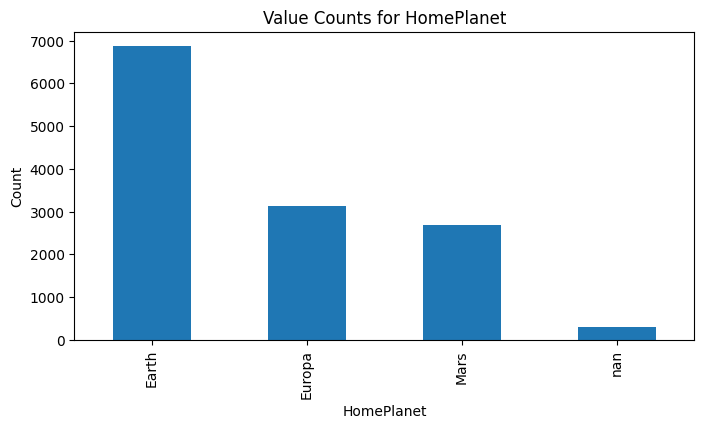

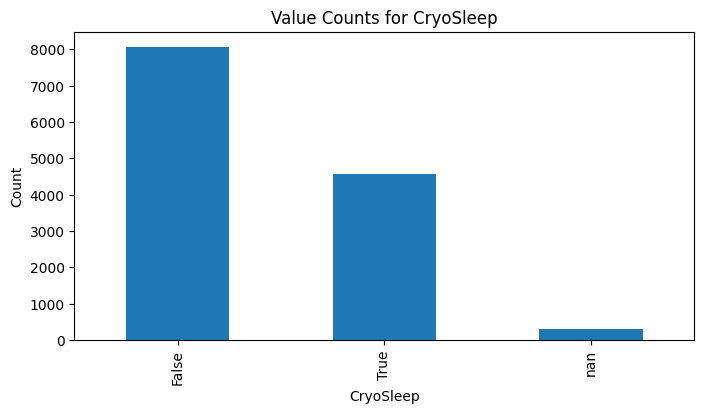

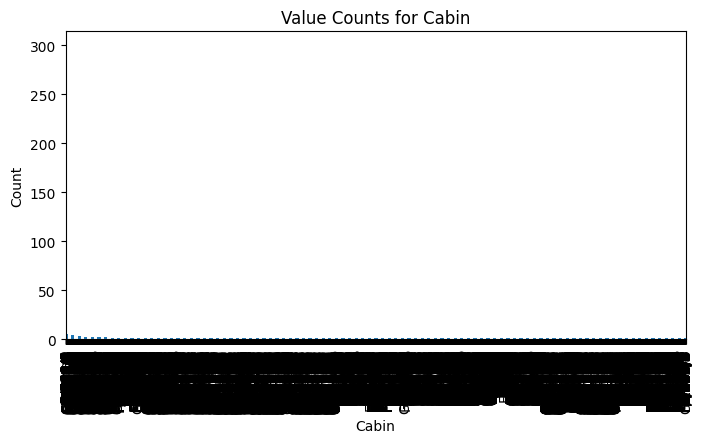

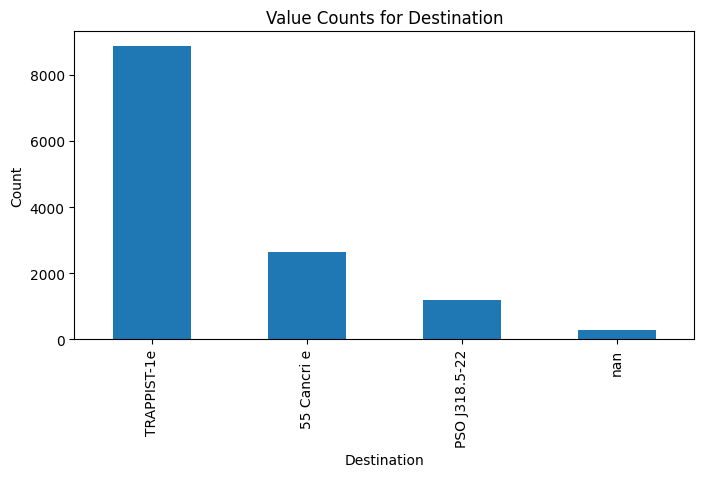

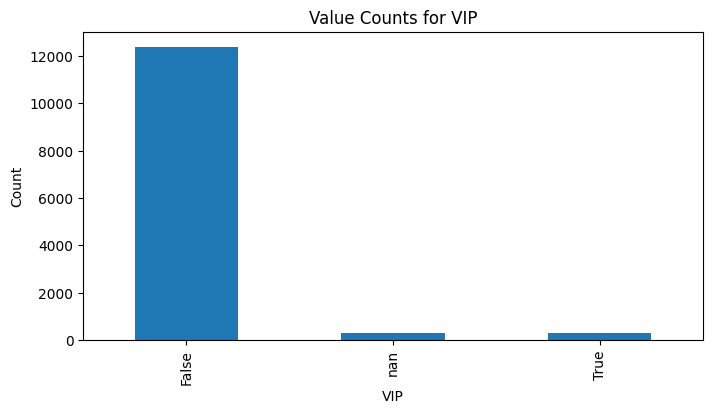

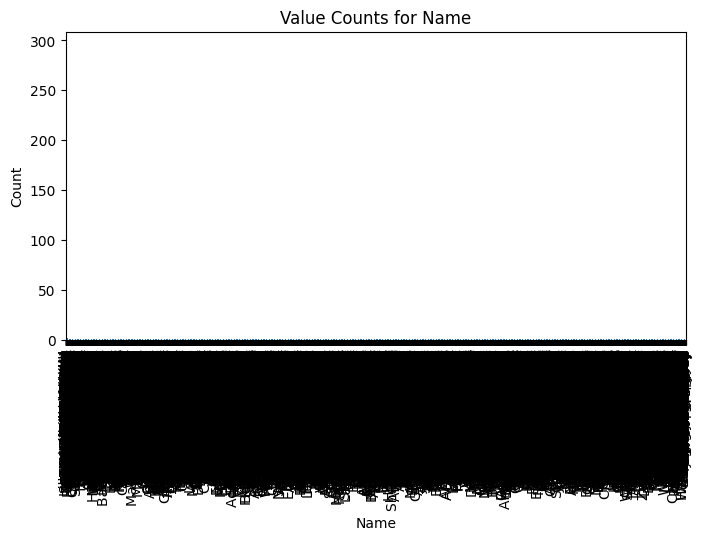

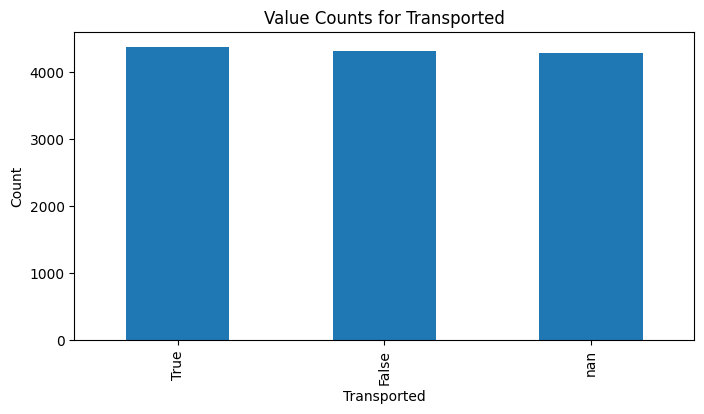

In [10]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Preprocessing

## Imputation of missing values

In [177]:
## Check for null values 
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [178]:
pd.DataFrame(df.median(numeric_only=True), columns=['median_value'])

,median_value
Age,27.0
RoomService,0.0
FoodCourt,0.0
ShoppingMall,0.0
Spa,0.0
VRDeck,0.0


In [179]:
# Fill numerical columns with median
df_filled = df.fillna(df.median(numeric_only=True))

In [180]:
## Check for null values 
df_filled.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age                0
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

In [204]:
categorical_cols = df_filled.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [181]:
# Fill categorical columns with mode, excluding 'Transported'
mode_dict = {}

for col in df.select_dtypes(include='object').columns:
    if col == 'Transported':
        continue
    mode = df[col].mode(dropna=True)
    if not mode.empty:
        mode_dict[col] = mode[0]
        df_filled[col] = df_filled[col].fillna(mode[0])

pd.DataFrame.from_dict(mode_dict, orient='index', columns=['mode_value']).reset_index().rename(columns={'index': 'column_name'})

/var/folders/4r/l49vr21j4mx5b_2zg1g_y5km0000gp/T/ipykernel_93642/3089694094.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled[col] = df_filled[col].fillna(mode[0])


,column_name,mode_value
0,PassengerId,0001_01
1,HomePlanet,Earth
2,CryoSleep,False
3,Cabin,G/160/P
4,Destination,TRAPPIST-1e
5,VIP,False
6,Name,Alasmon Meteet


In [182]:
## Check for null values 
df_filled.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported     4277
dtype: int64

In [183]:
## Remove rows with null values in 'Transported'
df_final = df_filled.dropna(subset=['Transported'])

In [184]:
df_final.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [185]:
df_final

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [186]:
## Logistic Transformation 
from sklearn.preprocessing import FunctionTransformer
import numpy as np
numerical_cols = df_final.select_dtypes(include='number').columns
log_transformer = FunctionTransformer(func=np.log1p, validate=True)
df_final[numerical_cols] = log_transformer.fit_transform(df_final[numerical_cols]) 

/var/folders/4r/l49vr21j4mx5b_2zg1g_y5km0000gp/T/ipykernel_93642/1522868479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[numerical_cols] = log_transformer.fit_transform(df_final[numerical_cols])


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

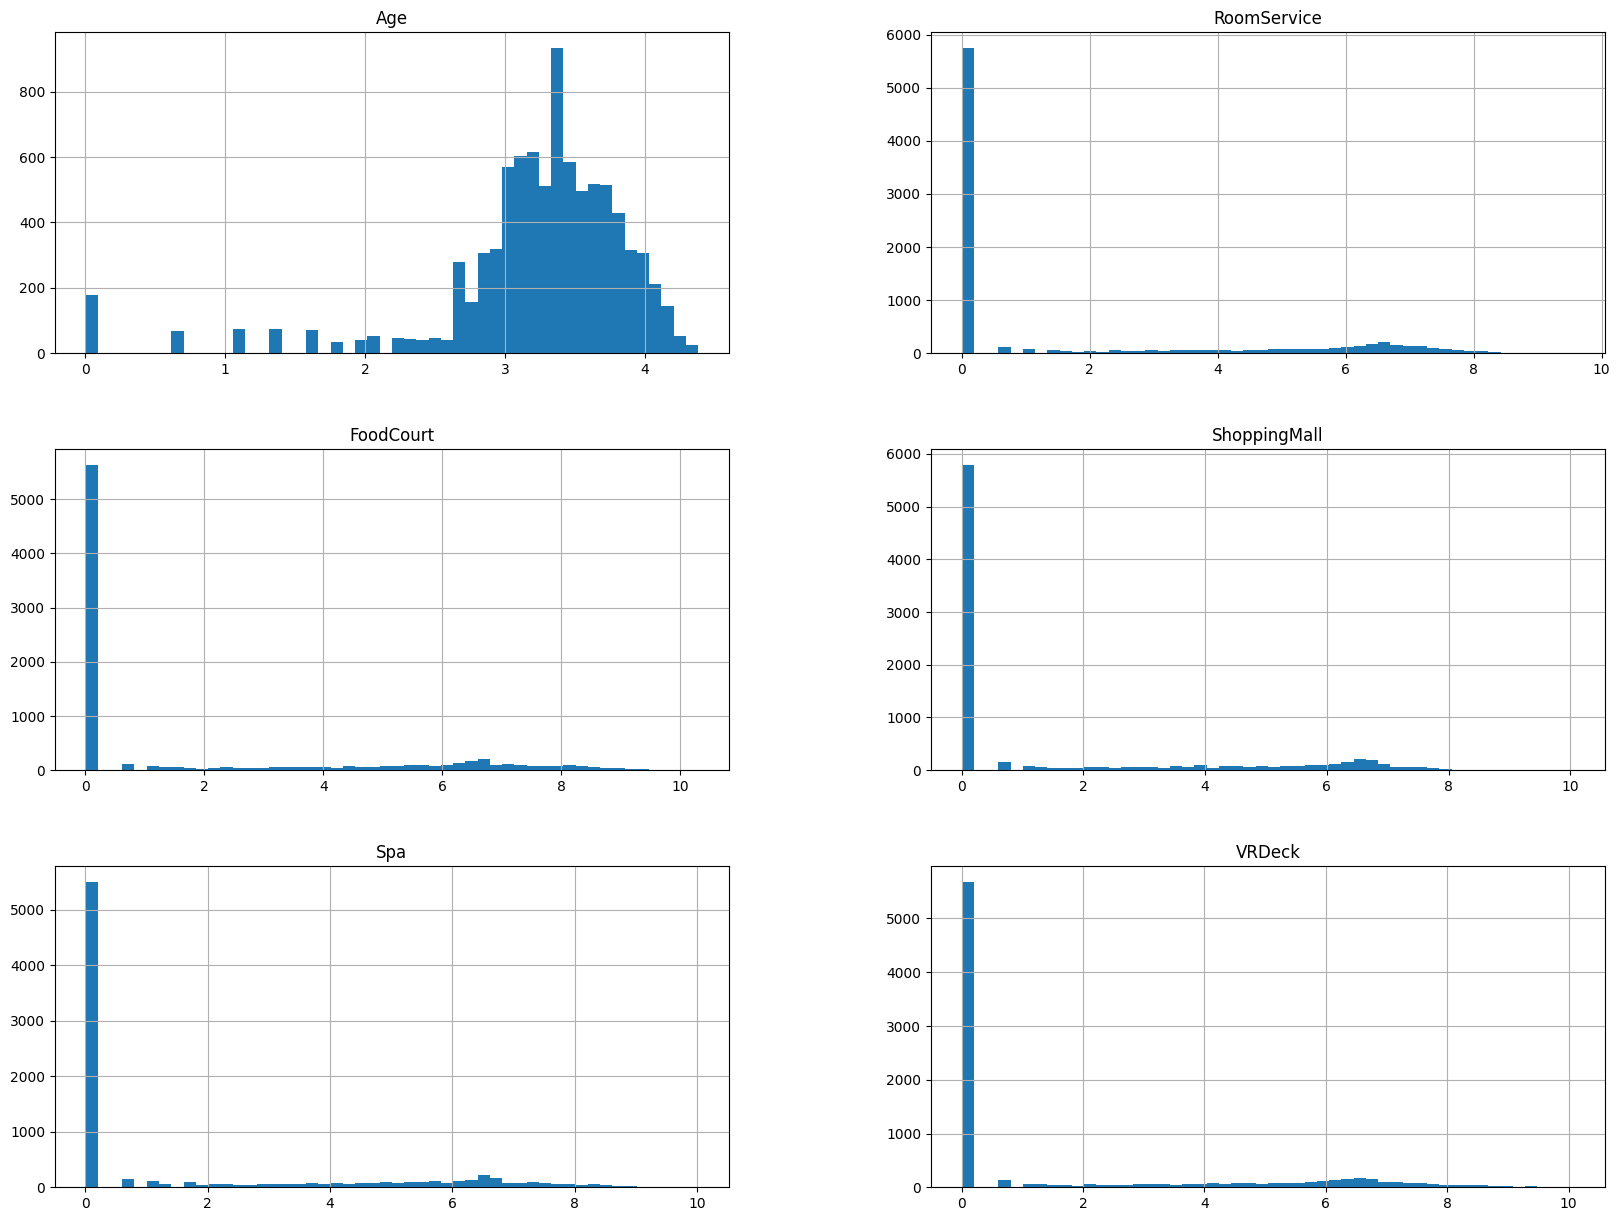

In [187]:
df_final[numerical_cols].hist(bins=50, figsize=(20,15))

In [188]:
## Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

df_final

/var/folders/4r/l49vr21j4mx5b_2zg1g_y5km0000gp/T/ipykernel_93642/2098261962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.640123,False,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,0.006901,False,1.090491,0.135040,0.646081,1.614565,0.745894,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,1.163749,True,0.753511,2.139858,-0.622995,2.518191,0.784254,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.421166,False,-0.638181,1.790516,1.682500,2.264863,1.277886,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,-0.512690,False,1.464342,0.803380,1.333879,1.624920,-0.240051,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,0.705856,True,-0.638181,2.359900,-0.622995,2.009974,0.931876,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,-0.362839,False,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,0.110589,False,-0.638181,-0.650080,2.312112,-0.413730,-0.640034,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,0.380946,False,-0.638181,1.721915,-0.622995,1.455450,2.302492,Celeon Hontichre,False


# Training

In [189]:
X = pd.get_dummies(df_final.drop(columns=['PassengerId','Cabin','Name','Transported']), drop_first=True)

mapping_dict = {
    True: 1,
    False: 0
}

y = df_final['Transported'].map(mapping_dict)


In [190]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2333,False,0.206863,False,-0.638181,0.722457,-0.622995,1.678759,-0.640034,False,False,False,True
2589,False,-0.435682,False,-0.638181,1.766308,0.726959,-0.664035,-0.640034,False,False,False,True
8302,True,0.206863,False,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,True,False,False,False
8177,False,-0.228000,False,-0.638181,-0.275483,1.585506,1.822050,-0.640034,False,True,False,True
500,True,0.535087,False,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,False,-0.362839,False,0.357745,-0.275483,1.315515,1.652547,-0.640034,False,False,False,True
5191,False,0.967436,False,1.766318,-0.650080,0.714593,1.732772,1.566819,False,True,False,True
5390,False,-0.105436,False,1.225984,-0.650080,1.779342,-0.664035,0.559913,False,False,True,False
860,False,0.460220,False,1.546406,-0.650080,2.257267,-0.664035,-0.640034,False,True,False,True


In [193]:
## Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [194]:

## Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [195]:
## Testing

y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model_lr.predict(X_test)


In [199]:
# Evaluate the models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.7791834387579069
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       861
           1       0.77      0.80      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Confusion Matrix:
 [[656 205]
 [179 699]]


In [198]:
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.7676825761932144
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76       861
           1       0.75      0.80      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix:
 [[630 231]
 [173 705]]
